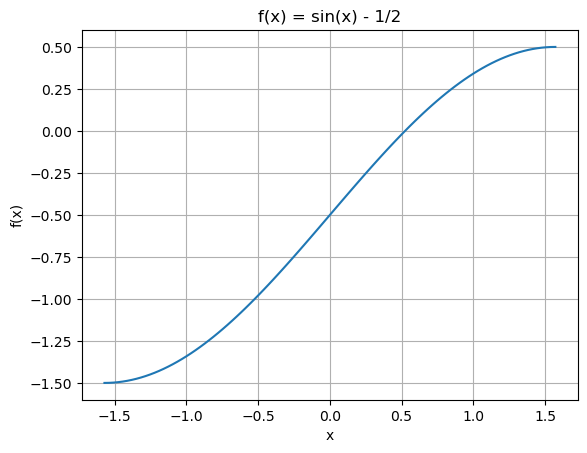

In [2]:
# plot of fx = sinx - 1/2
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi/2, np.pi/2, 100)
y = np.sin(x) - 0.5

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = sin(x) - 1/2')
plt.grid()
plt.show()



In [10]:
P = np.zeros((3,3))

def phi_0(x):
    return 1
def phi_1(x):
    return x
def phi_2(x):
    return x**2

def P_matrix(x):
    phi = [phi_0, phi_1, phi_2]
    for i in range(3):
        for j in range(3):
            P[i,j] = np.sum([phi[i](x_)* phi[j](x_) for x_ in x])
    return P

def Q_vector(x, y):
    phi = [phi_0, phi_1, phi_2]
    Q = np.zeros(3)
    for i in range(3):
        Q[i] = np.sum([phi[i](x_)* y_ for x_, y_ in zip(x,y)])
    return Q

num_steps = 10000.0

x = np.linspace(-np.pi/2, np.pi/2, int(num_steps))
y = np.sin(x) - 0.5

C = np.linalg.pinv(P_matrix(x)) @ Q_vector(x, y)

print("coefficients are", C)

y_hat = [C[0] + C[1]*x_ + C[2]*x_**2 for x_ in x]

# L2 error is 
print("L2 error is ",np.sum(((y_hat - y)**2)*(1/num_steps))**(1/2))

# Linf error is
print("Linf error is ",np.max(np.abs(y_hat - y)))


coefficients are [-5.00000000e-01  7.73995600e-01  3.47520822e-16]
L2 error is  0.08506931377055878
Linf error is  0.21578944608124606
